In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 05</span>

## Exercise 01
We are going to sample the position distributions for the energy eigenstates of the states $1s$ and $2p_z$ of the Hydrogen atom using the Metropolis algorithm. Lengths are measured in units of Bohr radius, i.e. the eigenfunctions are respectively:
\begin{align}
\Psi^\star_{1s}(\vec{x})= &\dfrac{1}{\sqrt{\pi}}e^{-\lVert\vec{x}\rVert}\\
\Psi^\star_{2p_z}(\vec{x})=&\dfrac{1}{\sqrt{8\pi}}x_3\,e^{-\lVert\vec{x}\rVert/2}
\end{align}
and the PDFs are of course their squared modulus.

The Metropolis algorithm requires the transition kernel $T(\vec{x},\vec{y})$ to be a priori specified. We will make the following choices:
-  A uniform kernel:
$$ 
T_\delta(\vec{x},\vec{y}):=\dfrac{\chi_{Q_y}(\vec{x})}{\delta^3}
$$
where $Q_y:=\bigl\{\vec{z}\in\mathbb{R}^3:\,\lVert\vec{z}-\vec{y}\rVert_\infty <\frac{\delta}{2}\bigr\}$ is the square of side $\delta$ centered in $\vec{y}$.
- A gaussian kernel:
$$
T_\sigma(\vec{x},\vec{y}):=\dfrac{1}{(2\pi\sigma^2)^{3/2}}\exp\biggl[-\dfrac{\lVert\vec{x}-\vec{y}\rVert^2}{2\sigma^2}\biggr]
$$

The parameters $\delta,\sigma$ are chosen so that each step is accepted with a probability of roughly $\frac{1}{2}$. 

The code is organized as follows: the method `Posizione Metropolis_Step(Multi_Dim_Function* f, char opt, Posizione x0, double delta, unsigned int * count)` of the class `class Random` creates a new configuration using the Metropolis algorithm built in order to have as a limiting distribution `f`, `x0` is the previous position of the Metropolis random walk and the transition kernel is chosen by `opt` (`delta` is the parameter of the kernel, `count` is used to check the acceptance probability).

For details on `class Posizione` see Lec. 2 while `class Multi_Dim_Function` resembles the abstract `class function` from the same lecture, expect its evaluating method is designed to receive a `std::vector<double>` instead of a single `double` variable:
```C++
class Multi_Dim_Function{
	public:
		virtual void SetParameter(char c, double p) =0;
		virtual double GetParameter(char c) const =0;
		virtual double operator()(vector<double> x) const =0;
};
```
The two classes `HAtom_1s` and `HAtom_2pz` inherit from `Multi_Dim_Function` and the virtual operator is implemented accordingly.
### Uniform kernel
For both PDFs we run the algorithm for $M=10^6$ steps divided into $N=100$ blocks. After some attempts we found that a good choice for the sides $\delta$ of the squares are respectively $\delta_{1s}=2.3$ and $\delta_{2pz}=5.1$ (the acceptance percentages being approximately $52\%$ and $55\%$). The random walks start from $x_{0,1s}=(1,1,1)$ and $x_{0,2pz}=(0,0,0)$ (in both cases the starting point is not chosen exactly on the position where it is most likely to find the particle, for the $1s$ the distance is slightly larger while for the $2p_z$ it is exactly in the point where the two lobes merge, see figure below for a better picture of the orbitals).

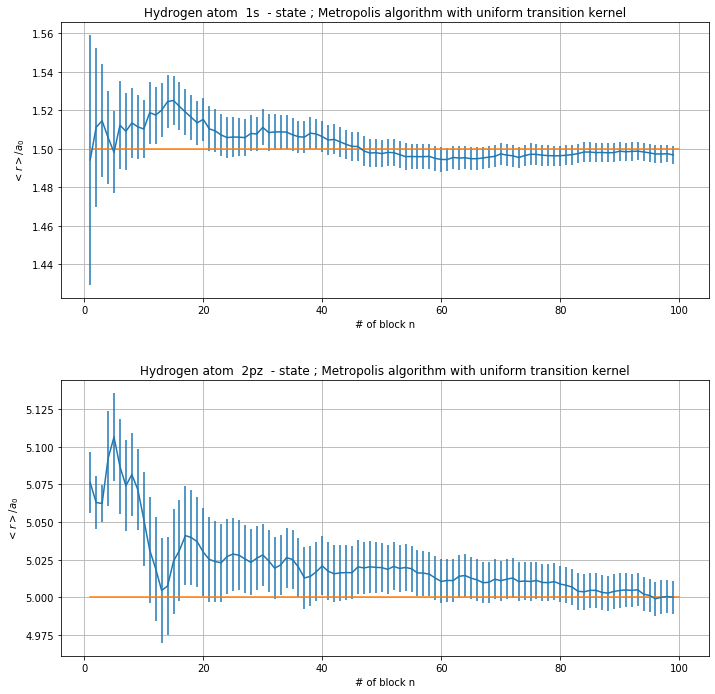

In [2]:
file=open("Es_lezione_05/dataEx05_1.dat")
line1=file.readline().split()
M=int(line1[0])
N=int(line1[1])
x=np.arange(1,N)
ave=np.zeros((4, N-1))
err=np.zeros((4, N-1))
i=0

for line in file.readlines():
    for j in range(4):
        ave[j, i]=float(line.split()[j])
        err[j, i]=float(line.split()[j+4])
    i+=1
    
file.close()

f, canvas=plt.subplots(2)
titles=[' 1s ', ' 2pz ']

for j in range(2):
    canvas[j].errorbar(x, ave[j], yerr=err[j])
    canvas[j].set(xlabel='# of block n', ylabel='$< r > / a_0$')
    canvas[j].set_title( "Hydrogen atom " + titles[j] + ' - state ; Metropolis algorithm with uniform transition kernel')
    canvas[j].grid(True)
    
canvas[0].plot([1,N], [1.5,1.5])
canvas[1].plot([1,N], [5,5])
    
plt.subplots_adjust(left=0.2, bottom=-1, right=1.7, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

With the data we set the equilibration is quite useless because we get fairly reasonable values for the expected distance in the first few blocks already. In both cases the convergence is quite fast (20 blocks are sufficient to let the expected value be compatible with the measurement within uncertainty).

### Starting at large distance
To get a better view of the time it takes to equilibrate the Metropolis algorithm, we may want to start from a point very far from the average distance of the distributions. The following graphs show the "instantaneous" distance from the origin of the walker for the Metropolis algorithm starting from $x_0=(100, 100, 100)$ and with $5000$ steps (i.e. for every step, no division into blocks is here made in order to better grasp the rate of "convergence").

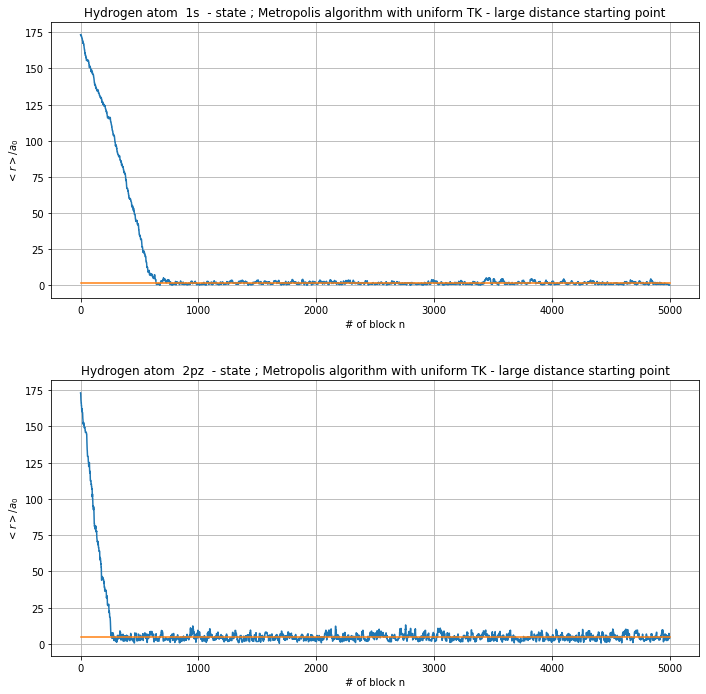

In [3]:
file=open("Es_lezione_05/dataEx05_1_far.dat")
n=5000
x1=np.arange(n)
pos=np.zeros((2, n))
i=0

for line in file.readlines():
    pos[0, i]=float(line.split()[0])
    pos[1, i]=float(line.split()[1])
    i+=1
    
file.close()

f, canvas=plt.subplots(2)
titles=[' 1s ', ' 2pz ']

for j in range(2):
    canvas[j].plot(x1, pos[j])
    canvas[j].set(xlabel='# of block n', ylabel='$< r > / a_0$')
    canvas[j].set_title( "Hydrogen atom " + titles[j] + ' - state ; Metropolis algorithm with uniform TK - large distance starting point')
    canvas[j].grid(True)
    
canvas[0].plot([1,n], [1.5,1.5])
canvas[1].plot([1,n], [5,5])
    
plt.subplots_adjust(left=0.2, bottom=-1, right=1.7, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We see that the distance of the walker settles around the expected value way before the 1000-th step is reached in both cases. Convergence is faster for the $2p_z$ state.

This also tells us why the equilibration of the system was needless in the first two simulations: if it took so few steps to reasonably equilibrate from a starting position far away, if we choose $x_0$ to be closer to the maximum likelihood area all the initial fluctuations are well "absorbed" into the first block.

### Normal kernel
Simulation parameters and starting points are the same as with the uniform kernel, the standard deviations of the two normal distributions are chosen to be respectively $\sigma_{1s}=0.75$ and $\sigma_{2pz}=1.8$ (acceptance percentages: roughly $50.5\%$ and $51.4\%$). 

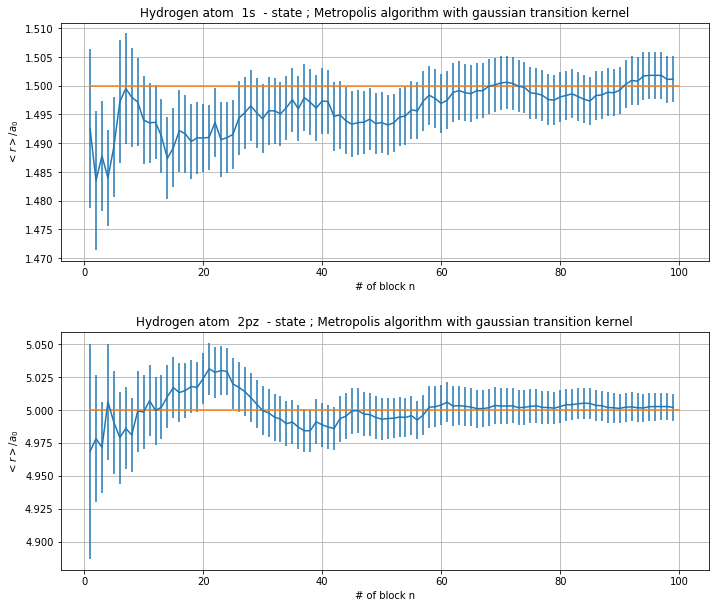

In [4]:
f1, canvas1=plt.subplots(2)
for j in range(2):
    canvas1[j].errorbar(x, ave[j+2], yerr=err[j+2])
    canvas1[j].set(xlabel='# of block n', ylabel='$< r > / a_0$')
    canvas1[j].set_title( "Hydrogen atom " + titles[j] + ' - state ; Metropolis algorithm with gaussian transition kernel')
    canvas1[j].grid(True)
    
canvas1[0].plot([1,N], [1.5,1.5])
canvas1[1].plot([1,N], [5,5])
    
plt.subplots_adjust(left=0.2, bottom=-0.7, right=1.7, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The choice of the parameters allows us to skip equilibration once again because the starting esteems are already fairly close to the expected values (i.e. oscillations are small). Convergence is once again quite fast, actually faster than the Metropolis algorithm with the uniform kernel (especially for the $2p_z$ state).

### Drawing the PDFs in 3D-space
As a final check of our Metropolis algorithm we print some ($10^4$) positions from the RWs and plot them in 3D-space.

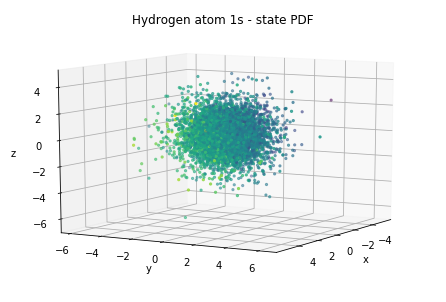

In [5]:
file=open("Es_lezione_05/1s-orbital.dat")
Psi1=np.zeros((3, 10000))
i=0

for line in file.readlines():
    for j in range(3):
        Psi1[j,i]=line.split()[j]
    i+=1


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Psi1[0], Psi1[1], Psi1[2], c=Psi1[0], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Hydrogen atom 1s - state PDF")
ax.view_init(10, 30)
plt.show()

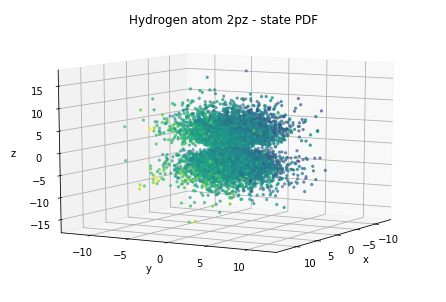

In [6]:
file=open("Es_lezione_05/2pz-orbital.dat")
Psi2=np.zeros((3, 10000))
i=0

for line in file.readlines():
    for j in range(3):
        Psi2[j,i]=line.split()[j]
    i+=1


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Psi2[0], Psi2[1], Psi2[2], c=Psi2[0], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Hydrogen atom 2pz - state PDF")
ax.view_init(10, 30)
plt.show()

In both cases we get figures that resemble the well-known shapes of the atomic orbitals (1s is spherical around the origin, $2p_z$ is stretched along the $z$ axis with a "hole" in the origin and two lobes pointing upwards and downwards).